In [35]:
## This project will create linear regression models for determining the price of used cars based on their characteristics.
## Both a general model and several specific models will be created.

In [36]:
## Packages 

import numpy as np #Linear algebra
import pandas as pd #allows data manipulations and matrices
#pip install mysql-connector-python 
import mysql.connector # SQL connecter
import seaborn as sns #For visialisations
import scipy.stats as stats #Visualisations, statistics
import matplotlib.pyplot as plt #matplotlib for visualisations 
from sklearn.linear_model import LinearRegression #used to add line of best fit


In [37]:
## Using a MySQL connecter to directly query the database and pull in the data we need.
# We do have the option here to query using where statements to optimise speed but the data set is fairly small so we don't need to.


# Establish the connection
connection = mysql.connector.connect(
    host='localhost',          
    user='root',      
    password='root15',  
    database='used_car'   
)

# Create a cursor object
cursor = connection.cursor()

# SQL Query
query = "SELECT * FROM used_car.audi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
audi = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()




True

In [38]:
# Repeating for all data we want to collect

# Create a cursor object
cursor = connection.cursor()

# SQL query
query = "SELECT * FROM used_car.bmw;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
bmw = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()




True

In [39]:

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.ford;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
ford = pd.DataFrame(result, columns=column_names)



In [40]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.hyundi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
hyundi = pd.DataFrame(result, columns=column_names)



In [41]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.merc;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
merc = pd.DataFrame(result, columns=column_names)


In [42]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.skoda;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
skoda = pd.DataFrame(result, columns=column_names)


In [43]:

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.all_used;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
all_used = pd.DataFrame(result, columns=column_names)


In [44]:
print(all_used)


          model  year  price transmission  mileage fuelType  tax   mpg  \
0            A1  2017  12500       Manual    15735   Petrol  150  55.4   
1            A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2            A1  2016  11000       Manual    29946   Petrol   30  55.4   
3            A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4            A3  2019  17300       Manual     1998   Petrol  145  49.6   
...         ...   ...    ...          ...      ...      ...  ...   ...   
62855      Yeti  2014  11440    Semi-Auto    14569   Petrol  160  44.8   
62856   Octavia  2014  10990    Semi-Auto    49999   Petrol   30  56.5   
62857     Fabia  2017   9500    Semi-Auto    17131   Petrol  145  61.4   
62858    Citigo  2016   5999       Manual    21747   Petrol   20  62.8   
62859     Fabia  2017   9232    Semi-Auto    42530   Petrol   20  60.1   

       engineSize   make  
0             1.4   audi  
1             2.0   audi  
2             1.4   audi  
3  

In [45]:
# Function to list all data frames
def list_dataframes():
    return [var_name for var_name, var_value in globals().items() if isinstance(var_value, pd.DataFrame)]

# List all DataFrames in the current namespace
dataframes = list_dataframes()
print("Available DataFrames:", dataframes)

Available DataFrames: ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'all_used', 'vif_data']


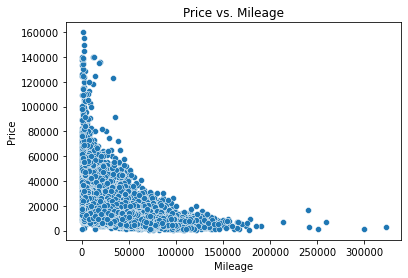

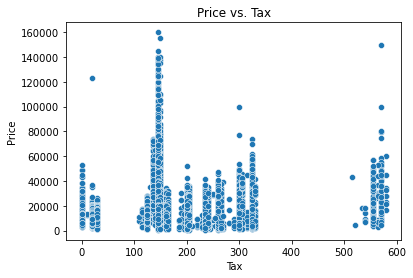

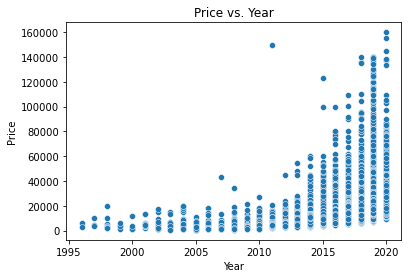

In [46]:
## Visualising data

# Looking for variables that have linear relationships with price.
# Pairplot to see relationships.
# Scatter plot of price vs. mileage
sns.scatterplot(data=all_used, x='mileage', y='price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. tax
sns.scatterplot(data=all_used, x='tax', y='price')
plt.title('Price vs. Tax')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. year
sns.scatterplot(data=all_used, x='year', y='price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Notes: 
# None of these are linear so we will have to use transformations to create the linear relationship we are looking for.
# Tax isn't linear nor can it be 'saved' by transformations. Thus we will not include it in any models. 

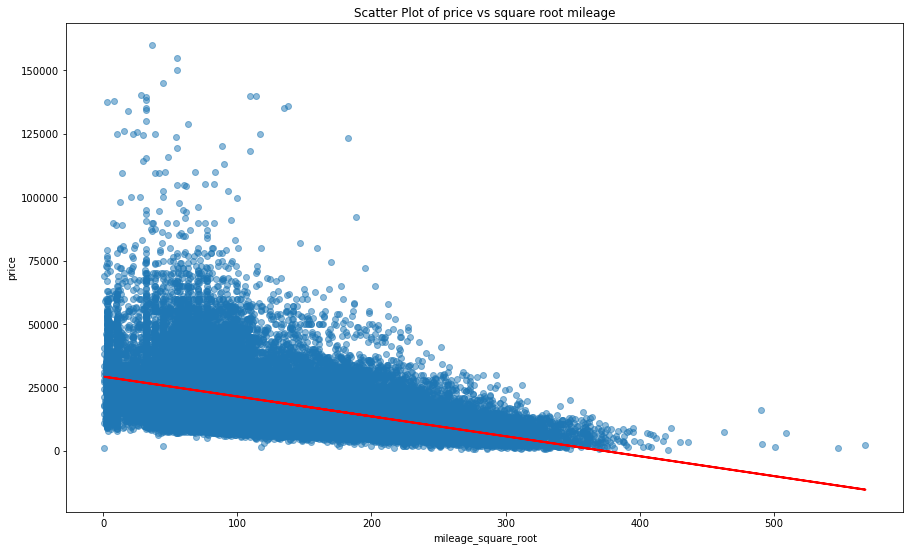

In [47]:
##Transforming variables
# This will add an column containg the square root of mileage
all_used['mileage_square_root'] = np.sqrt(all_used['mileage'])
#Scatterplot of price vs. mileage_square_root
plt.figure(figsize=(15, 9))
plt.scatter(all_used['mileage_square_root'], all_used['price'], alpha=0.5)
plt.xlabel('mileage_square_root')
plt.ylabel('price')
plt.title('Scatter Plot of price vs square root mileage')

# Fit linear regression model
X = all_used['mileage_square_root'].values.reshape(-1, 1)
y = all_used['price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['mileage_square_root'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

## This looks linear enough and we can use statistical tests to confirm this. 
## Also, this data contains 60 000+ entries so the outliers with abnormally high price and mileage don't stop this relationship from being line

sns.histplot(all_used['price'], bins=10, kde=False)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Check for NaN values in the dataframe
print(all_used.isnull().sum())

model                  0
year                   0
price                  0
transmission           0
mileage                0
fuelType               0
tax                    0
mpg                    0
engineSize             0
make                   0
mileage_square_root    0
dtype: int64


In [49]:
## Creating a new variable called age to calculate the age of a car
# Calculate the maximum year
max_year = all_used['year'].max()

# Calculate the relative age of each car, add 1 to make log transforms work.
all_used['age'] = ((max_year - all_used['year'])+1)

min((all_used['age']))


1

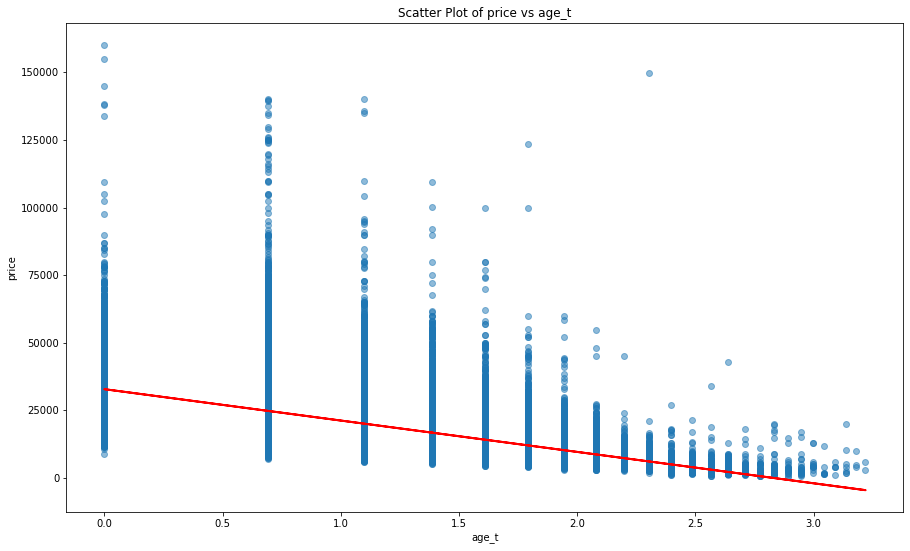

In [50]:
##Transforming variables

# Various transformations to try
all_used['age_t'] = np.log(all_used['age'])
all_used['age_t2'] = np.exp(all_used['age'])
all_used['age_t3'] = np.power(all_used['age'],2)
all_used['age_t4'] = np.power(all_used['age'],3)
all_used['age_t5'] = np.power(all_used['age'],1/2)
all_used['age_t6'] = np.power(all_used['age'],1/4)



#Scatterplot of price vs. mileage
plt.figure(figsize=(15, 9))
plt.scatter(all_used['age_t'], all_used['price'], alpha=0.5)
plt.xlabel('age_t')
plt.ylabel('price')
plt.title('Scatter Plot of price vs age_t')

# Fit linear regression model
X = all_used['age_t'].values.reshape(-1, 1)
y = all_used['price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['age_t'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

In [51]:
## Lets scale mileage so that a unit is equal to 1000 miles
all_used['thousand_miles'] = all_used['mileage']/1000
print(all_used['thousand_miles'])

0        15.735
1        36.203
2        29.946
3        25.952
4         1.998
          ...  
62855    14.569
62856    49.999
62857    17.131
62858    21.747
62859    42.530
Name: thousand_miles, Length: 62860, dtype: float64


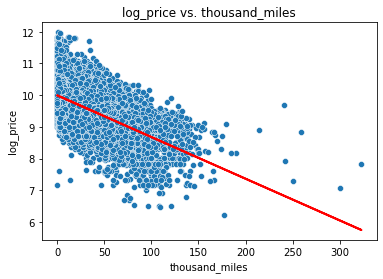

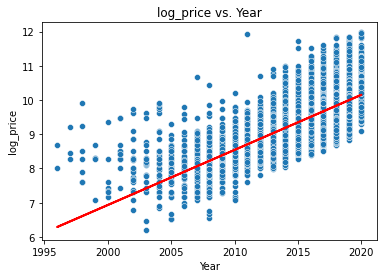

In [52]:
##Alternatively we can transform our dependent variable to try create a linear relationship.
#This transforms the dependent variable price by log 
all_used['log_price'] = np.log(all_used['price'])

# Scatter plot of price vs. mileage
sns.scatterplot(data=all_used, x='thousand_miles', y='log_price')
plt.title('log_price vs. thousand_miles')
plt.xlabel('thousand_miles')
plt.ylabel('log_price')

# Fit linear regression model
X = all_used['thousand_miles'].values.reshape(-1, 1)
y = all_used['log_price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['thousand_miles'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()


# Scatter plot of price vs. year
sns.scatterplot(data=all_used, x='year', y='log_price')
plt.title('log_price vs. Year')
plt.xlabel('Year')
plt.ylabel('log_price')

# Fit linear regression model
X = all_used['year'].values.reshape(-1, 1)
y = all_used['log_price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['year'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

## This creates a more linear fit than the previous transformations so we will create a model using these variables.

In [66]:
from scipy.stats import pearsonr

# Pearson Correlation Coefficient
correlation, p_value = pearsonr(all_used['year'], all_used['log_price'])
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')
# Pearson Correlation Coefficient
correlation, p_value = pearsonr(all_used['thousand_miles'], all_used['log_price'])
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')


Pearson Correlation Coefficient: 0.6371810949760583
P-value: 0.0
Pearson Correlation Coefficient: -0.5288028303214058
P-value: 0.0


In [53]:
## Creating our initial general model for predicting car prices based on the mileage and year.
## The goal is to create a accurate general model that will work on all cars. 

# Import the ols function
from  statsmodels.formula.api  import ols
# Create the model object
car_price = ols('log_price ~ year + thousand_miles', data=all_used)
# Fit the model
car_price = car_price.fit()

# Print the parameters of the fitted model
print(car_price.params)

Intercept        -270.247168
year                0.138815
thousand_miles     -0.002937
dtype: float64


In [54]:
# Reports summary information of the model so we can diagnose whether the model is accurate and/or fitting.
print(car_price.summary())
# Findings:
#-The model is significant and so are its chosen explanatory variables. 
#- Reasonable R^2 value indicates explanatory variables chosen somewhat explain variation in log_price
# Durbin-Watson test suggests negative autocorrelation 
# The Note at the bottom of the summary is suggesting multicolinearity or another numerical problem 



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 2.203e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:49:26   Log-Likelihood:                -33238.
No. Observations:               62860   AIC:                         6.648e+04
Df Residuals:                   62857   BIC:                         6.651e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -270.2472      2.355   -114.

In [69]:
np.exp(-0.0029) -1 

-0.0028957990618880824

In [67]:
## Lets address multicolinearity by calculating VIF (variance inflation factor)
import statsmodels.api as sm #Stats models 
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used to calculate VIF
X = all_used[["year","thousand_miles",]]
X = sm.add_constant(X)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# Calculate VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Convert VIF to normal number format by rounding
vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)
## The result here suggests that the data doesn't have any multicolinearity 

          feature         VIF
0           const  2067262.97
1            year        2.27
2  thousand_miles        2.27


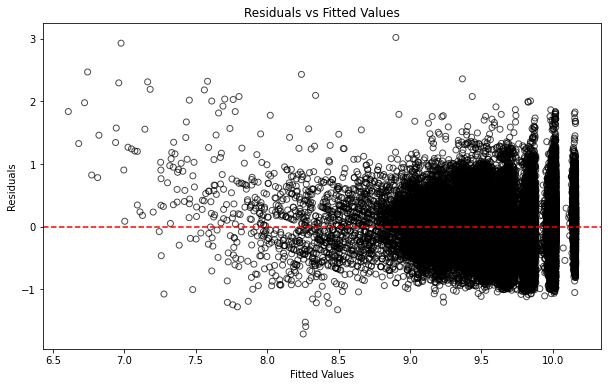

In [57]:
#Lets look at the distribution of residuals and figure out if we have heteroskedasticity

fitted_vals = car_price.fittedvalues
residuals = car_price.resid

# Ploting residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, edgecolor='k', facecolor='none', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

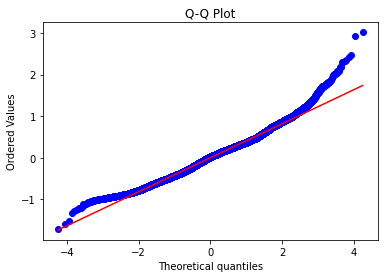

In [58]:
import scipy.stats as stats 

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

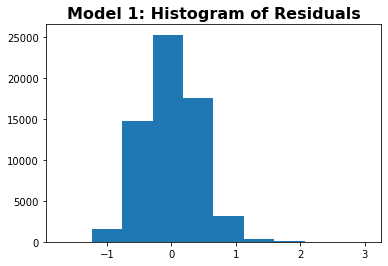

In [59]:
# Check normality of residuals
plt.hist(residuals)
plt.title('Model 1: Histogram of Residuals', fontsize=16, weight='bold')
plt.show()

c:\Users\Danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


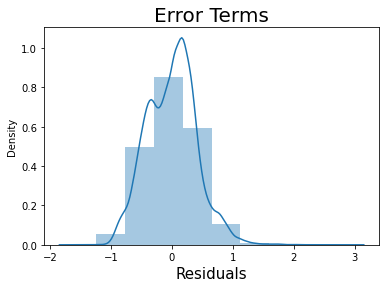

In [60]:
sns.distplot(residuals, bins = 10) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()